<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Python-Practice/blob/main/09_04_%EB%B9%85%EC%BD%98_%EB%8C%80%EB%B9%84_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅콘테스트 대비 시계열 부분 정리 

시계열 데이터를 이용하여 예측 (빅콘 데이터의 경우 범주형 자료이므로 범주형 자료를 예측하는 방법에 대해서도 고려)


#ARIMA(Autoregressive Integrated Moving Average)

ARIMA의 경우 자기회귀와 이동평균을 둘 다 고려하는 모형 ARMA 와 ARIMA 모델의 차이점은 ARIMA 모델의 경우 시계열의 비정상성을 설명하기 위해 관측치간의 차분을 이용 

차분을 하는 이유 -> 현실에 존재하는 시계열 자료는 불안정한 경우가 많음 그런데 AR 모형이나 MR 모형 그리고 ARMA 모형으로는 이러한 불안정성을 설명할수가 없다

따라서 요즘 주관심사인 비트코인 가격을 이용하여 시계열 분석을통해 빅콘 데이터 분석에 도움이 되고자 시계열 분석을 실시


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
series= pd.read_csv("/content/drvie/MyDrive/market-price.csv",header=0, index_col=0, squeeze=True)

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [9]:
series

Timestamp
2021-07-06 00:00:00    33747.97
2021-07-07 00:00:00    34211.01
2021-07-08 00:00:00    33839.04
2021-07-09 00:00:00    32877.41
2021-07-10 00:00:00    33818.52
                         ...   
2021-08-31 00:00:00    47074.77
2021-09-01 00:00:00    47155.87
2021-09-02 00:00:00    48862.76
2021-09-03 00:00:00    49329.01
2021-09-04 00:00:00    50035.33
Name: market-price, Length: 61, dtype: float64

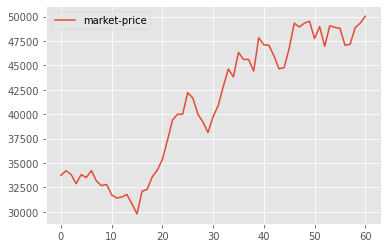

In [4]:
series.plot()

통상적으로 p+q<2 , p*q=0 인 값들을 많이 사용함 
실제로 대부분의 시계열 자료에서는 하나의 경향만을 강하게 띄기 때문에 이렇게 사용하는것이 더 잘맞는다고 한다.

시계열 데이터가 AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.
반대로, MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.
급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용할 수 있다. 또한 데이터를 차분하여 ACF 및 PACF 계산함으로써 적절한 차분횟수까지 구할 수 있다

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

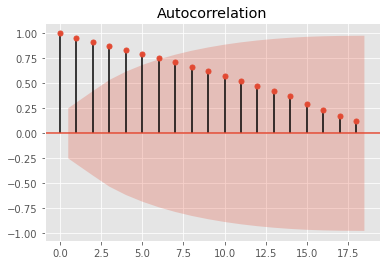

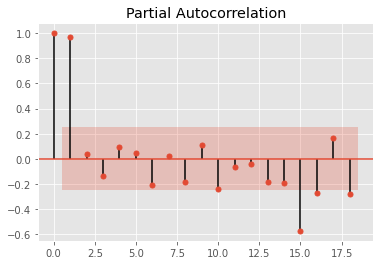

In [10]:
plot_acf(series)
plot_pacf(series)
plt.show()

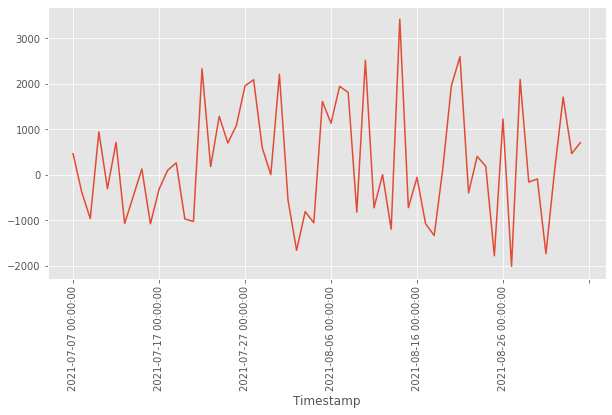

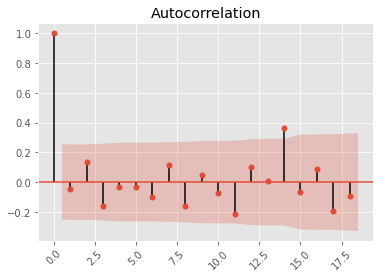

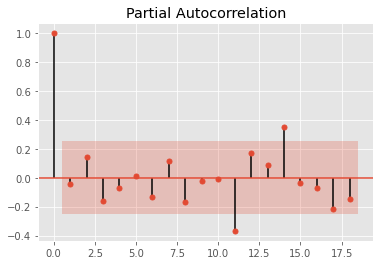

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10,5))
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plt.xticks(rotation = 90)
plot_acf(diff_1)
plt.xticks(rotation = 45)
plot_pacf(diff_1)
plt.show()

In [19]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -513.575
Method:                       css-mle   S.D. of innovations           1262.234
Date:                Sat, 04 Sep 2021   AIC                           1033.150
Time:                        07:00:34   BIC                           1039.434
Sample:                    07-07-2021   HQIC                          1035.608
                         - 09-04-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  271.3255    157.359      1.724      0.090     -37.092     579.743
ma.L1.D.market-price    -0.0349      0.115     -0.304      0.763      -0.261       0.191
            

In [20]:

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -514.976
Method:                       css-mle   S.D. of innovations           1292.061
Date:                Sat, 04 Sep 2021   AIC                           1033.952
Time:                        07:01:00   BIC                           1038.141
Sample:                    07-07-2021   HQIC                          1035.590
                         - 09-04-2021                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ma.L1.D.market-price    -0.0006      0.111     -0.005      0.996      -0.218       0.217
                                    Roots                                    
                  Real 

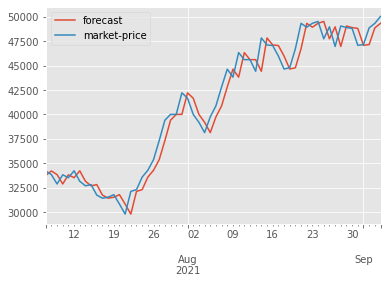

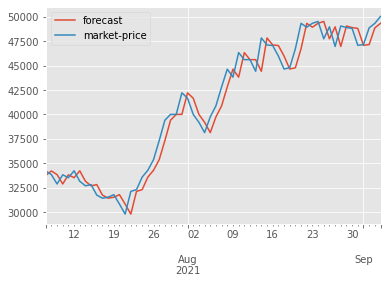

In [21]:
model_fit.plot_predict()

In [22]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([50034.92809062]), array([1292.06130136]), array([[47502.53447414, 52567.3217071 ]]))
